# A Machine Learning Approach to Visual Perception of Corridor Trails for Mobile Robots

@Author: Artur Leinweber <br>
@E-Mail: arturleinweber@live.de <br>
@University: Westphalian University of Gelsenkirchen <br>

### Imports
tf.keras is TensorFlow's implementation of the Keras API specification. This is a high-level API to build and train models that includes first-class support for TensorFlow-specific functionality.
Importing tf.keras makes TensorFlow easier to use without sacrificing flexibility and performance.


In [1]:
%matplotlib inline  
import tensorflow as tf
from tensorflow.keras import layers, regularizers, utils, preprocessing, optimizers, backend
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import time
import os
import cv2
import sys

print("Tensorflow Version: " + tf.VERSION)
print("Keras Version: " + tf.keras.__version__)
tf.logging.set_verbosity(tf.logging.ERROR)

/home/gas/venv_laptop_jupyter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gas/venv_laptop_jupyter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gas/venv_laptop_jupyter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gas/venv_laptop_jupyter/lib/python3.6/site-packages/ten

Tensorflow Version: 1.14.0
Keras Version: 2.2.4-tf


Progressbar function

In [2]:
def update_progress(progress, custom=""):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = custom + "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text, end="\r")

### Sequential model
In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model.

In [3]:
# Layer 1
Conv2DLayer1 = layers.Conv2D(input_shape = (101,101,3),
                             filters = 32,
                             kernel_size = (4,4),
                             padding = "valid",
                             strides = (1, 1),
                             kernel_initializer = "glorot_uniform",
                             kernel_regularizer = regularizers.l2(0.0005)) 

ActivationLayer1 = layers.Activation("tanh")

NormalizationLayer1 = layers.BatchNormalization()

PoolingLayer1 = layers.MaxPooling2D(pool_size = (2, 2),
                                    strides = (2, 2),
                                    padding = "valid")

# Layer 2
Conv2DLayer2 = layers.Conv2D(filters = 32,
                             kernel_size = (4,4),
                             padding = "valid",
                             strides = (1, 1),
                             kernel_initializer = "glorot_uniform",
                             kernel_regularizer = regularizers.l2(0.0005))

ActivationLayer2 = layers.Activation("tanh")

NormalizationLayer2 = layers.BatchNormalization()

PoolingLayer2 = layers.MaxPooling2D(pool_size = (2, 2),
                                    strides = (2, 2),
                                    padding = "valid")
# Layer 3
Conv2DLayer3 = layers.Conv2D(filters = 32,
                             kernel_size = (4,4),
                             padding = "valid",
                             strides = (1, 1),
                             kernel_initializer = "glorot_uniform",
                             kernel_regularizer = regularizers.l2(0.0005))

ActivationLayer3 = layers.Activation("tanh")

NormalizationLayer3 = layers.BatchNormalization()

PoolingLayer3 = layers.MaxPooling2D(pool_size = (2, 2),
                                    strides = (2, 2),
                                    padding = "valid")
# Layer 4
Conv2DLayer4 = layers.Conv2D(filters = 32,
                             kernel_size = (3,3),
                             padding = "valid",
                             strides = (1, 1),
                             kernel_initializer = "glorot_uniform",
                             kernel_regularizer = regularizers.l2(0.0005))

ActivationLayer4 = layers.Activation("tanh")

NormalizationLayer4 = layers.BatchNormalization()

PoolingLayer4 = layers.MaxPooling2D(pool_size = (2, 2),
                                    strides = (2, 2),
                                    padding = "valid")
# Fully Connected Layer
FlattenLayer5 = layers.Flatten()
#DenseLayer5 = layers.Dense(200, kernel_initializer = "glorot_uniform")
DenseLayer5 = layers.Dense(130, kernel_initializer = "glorot_uniform")
ActivationLayer5 = layers.Activation("tanh")
NormalizationLayer5 = layers.BatchNormalization()

# Softmax Classifier
DenseLayer6 = layers.Dense(3)
ActivationLayer6 = layers.Activation("softmax")

model_architecture = [
         Conv2DLayer1,
         ActivationLayer1,
         NormalizationLayer1,
         PoolingLayer1,
         
         Conv2DLayer2,
         ActivationLayer2,
         NormalizationLayer2,
         PoolingLayer2,
         
#         Conv2DLayer3,
#         ActivationLayer3,
#         NormalizationLayer3,
#         PoolingLayer3,
         
#         Conv2DLayer4,
#         ActivationLayer4,
#         NormalizationLayer4,
#         PoolingLayer4,
         
         FlattenLayer5,
         DenseLayer5,
         ActivationLayer5,
         NormalizationLayer5,
         
         DenseLayer6,
         ActivationLayer6]

model = tf.keras.Sequential(model_architecture)

### Prints a summary representation of the model

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        1568      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        1

### Plot a graph of the model and save it to a file

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


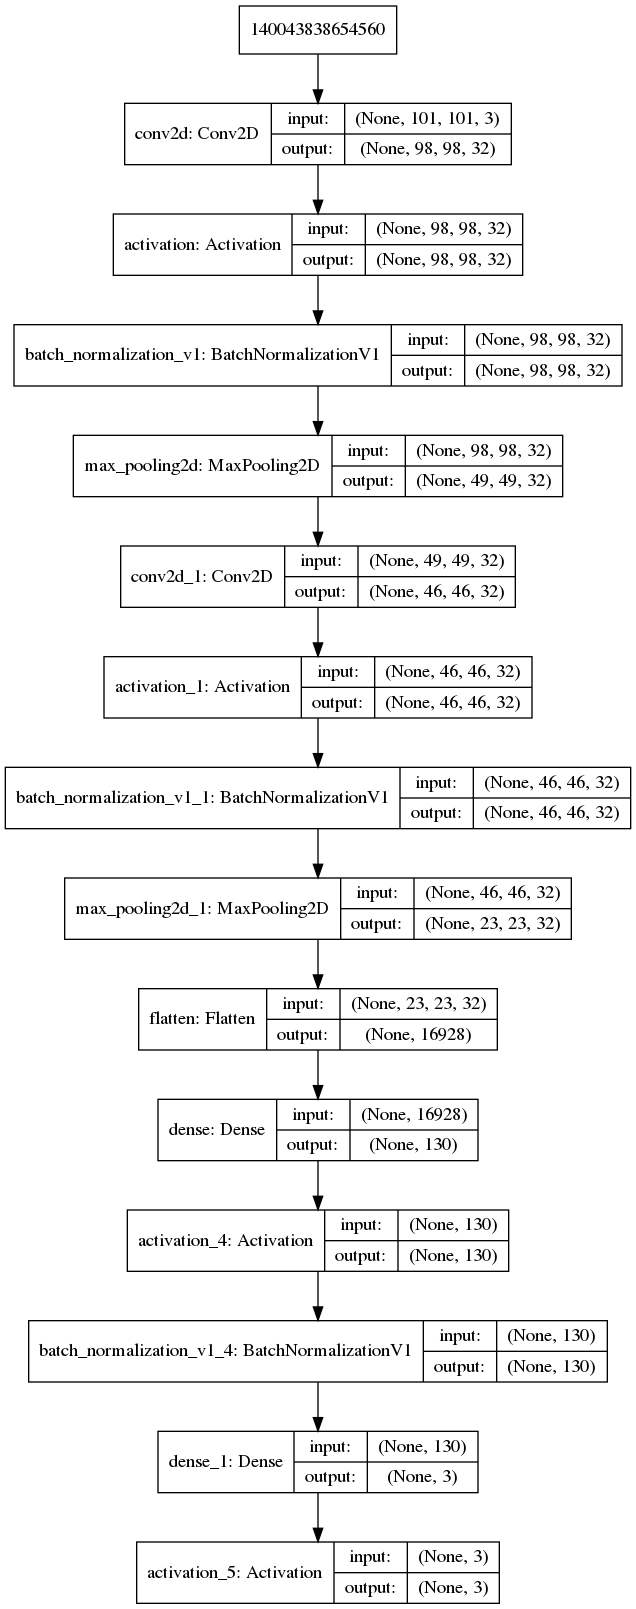

In [5]:
utils.plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'plots/model.png')
Image(retina = True, filename = 'plots/model.png')

## Set up Training

Arguments for Training, that we need to set are:
* The path to the input dataset.
* The number of epochs to train for.
* Path for Our loss/accuracy plot, that will be output to disk
* etc.

In [6]:
MODEL_NAME = "corridor"
DATASET_PATH = os.getcwd() + "/dataset/corridor"
VALIDATION_PATH = DATASET_PATH + "/validation"
TRAIN_PATH = DATASET_PATH + "/train"
TRAIN_EVAL_PLOT_PATH = os.getcwd() + "/plots"


NUMBER_OF_EPOCHS = 300
BATCH_SIZE = 64
INIT_LEARNING_RATE = 1e-4
DECAY_LEARNING_RATE = 1e-4 / NUMBER_OF_EPOCHS

Here we can see the dataset structure:

+ dataset / corridor
    
    - validation
        - left (X Files)
        - forward (X Files)
        - right (X Files)
    - train
        - left (X Files)
        - forward (X Files)
        - right (X Files)

Initialize the set of labels from dataset we are going to train our network on.

In [7]:
LABELS = list(["left","forward","right"])

Genrate a list of image pathes for our training

In [8]:
train_image_paths = list(paths.list_images(TRAIN_PATH))
validation_image_paths = list(paths.list_images(VALIDATION_PATH))

print("Size of the train-dataset: " + str(len(train_image_paths)))
print("Size of the validation-dataset: " + str(len(validation_image_paths)))

Size of the train-dataset: 30914
Size of the validation-dataset: 15305


In [ ]:
i = 0.0
for imagePath in train_image_paths:

    update_progress(i / len(train_image_paths), "Loading train images ")
    i = i + 1.0
    
    label = imagePath.split(os.path.sep)[-2]
    filename = imagePath.split(os.path.sep)[-1]
    if label not in LABELS:
        continue
 
    image = cv2.imread(imagePath)[212:906, 468:1399]
    image = cv2.resize(image, (101, 101))
    cv2.imwrite('/home/gas/UAV-II/JupyterNotebooks/CNN/dataset/corridor_m/train/' + label + '/' + filename, image)

In [9]:
train_image_paths = list(paths.list_images('/home/gas/UAV-II/JupyterNotebooks/CNN/dataset/corridor_m/train/'))

print("Size of the train-dataset: " + str(len(train_image_paths)))
print("Size of the validation-dataset: " + str(len(validation_image_paths)))

Size of the train-dataset: 30914
Size of the validation-dataset: 15305


In [10]:
i = 0.0
for imagePath in train_image_paths:

    update_progress(i / len(train_image_paths), "Loading train images ")
    i = i + 1.0
    
    label = imagePath.split(os.path.sep)[-2]
    if label == 'left':
        label = 'right'
    elif label == 'right':
        label = 'left'
    filename = imagePath.split(os.path.sep)[-1]
    if label not in LABELS:
        continue
 
    image = cv2.flip(cv2.imread(imagePath), 1)
    cv2.imwrite('/home/gas/UAV-II/JupyterNotebooks/CNN/dataset/corridor_m/train/' + label + '/f' + filename, image)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Grab the list of images in our dataset directory, then initialize the list of data (i.e., images) and class images

In [11]:
train_images = []
validation_images = []

train_labels = []
validation_labels = []
i = 0.0

for imagePath in train_image_paths:

    update_progress(i / len(train_image_paths), "Loading train images ")
    i = i + 1.0
    
    label = imagePath.split(os.path.sep)[-2]
 
    if label not in LABELS:
        continue
 
    image = cv2.imread(imagePath)
 
    train_images.append(image)
    train_labels.append(label)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
i = 0.0
for imagePath in validation_image_paths:

    update_progress(i / len(validation_image_paths), "Loading validation images ")
    i = i + 1.0
    
    label = imagePath.split(os.path.sep)[-2]
    filename = imagePath.split(os.path.sep)[-1]
    if label not in LABELS:
        continue
 
    image = cv2.imread(imagePath)[212:906, 468:1399]
    image = cv2.resize(image, (101, 101))
    cv2.imwrite('/home/gas/UAV-II/JupyterNotebooks/CNN/dataset/corridor_m/valid/' + label + '/' + filename, image)

In [12]:
validation_image_paths = list(paths.list_images('/home/gas/UAV-II/JupyterNotebooks/CNN/dataset/corridor_m/valid/'))


In [13]:
i = 0.0
for imagePath in validation_image_paths:

    update_progress(i / len(validation_image_paths), "Loading validation images ")
    i = i + 1.0
    
    label = imagePath.split(os.path.sep)[-2]
    if label == 'left':
        label = 'right'
    elif label == 'right':
        label = 'left'
    filename = imagePath.split(os.path.sep)[-1]
    if label not in LABELS:
        continue

    image = cv2.flip(cv2.imread(imagePath), 1)
    cv2.imwrite('/home/gas/UAV-II/JupyterNotebooks/CNN/dataset/corridor_m/valid/' + label + '/f' + filename, image)

In [14]:
i = 0.0
for imagePath in validation_image_paths:

    update_progress(i / len(validation_image_paths), "Loading validation images ")
    i = i + 1.0
    
    label = imagePath.split(os.path.sep)[-2]
 
    if label not in LABELS:
        continue
 
    image = cv2.imread(imagePath)
 
    validation_images.append(image)
    validation_labels.append(label)
    

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Convert the data into a NumPy array, then preprocess it by scaling all pixel intensities to the range (0, 1)

In [15]:
train_images = np.array(train_images, dtype = "float") / 255.0
validation_images = np.array(validation_images, dtype = "float") / 255.0

Creating one-hot encoding vectors on the labels (for each image!)

In [16]:
left_hot_encoding = np.ndarray((3,),dtype=np.int64,strides=(8,))
forward_hot_encoding = np.ndarray((3,),dtype=np.int64,strides=(8,))
right_hot_encoding = np.ndarray((3,),dtype=np.int64,strides=(8,))

train_hot_encoding_vectors = []
validation_hot_encoding_vectors = []

left_hot_encoding[:] =    [1, 0, 0]
forward_hot_encoding[:] = [0, 1, 0]
right_hot_encoding[:] =   [0, 0, 1]

for label in train_labels:
    if(label == "left"):
        train_hot_encoding_vectors.append(left_hot_encoding)
    elif(label == "forward"):
        train_hot_encoding_vectors.append(forward_hot_encoding)
    elif(label == "right"):
        train_hot_encoding_vectors.append(right_hot_encoding)
        
for label in validation_labels:
    if(label == "left"):
        validation_hot_encoding_vectors.append(left_hot_encoding)
    elif(label == "forward"):
        validation_hot_encoding_vectors.append(forward_hot_encoding)
    elif(label == "right"):
        validation_hot_encoding_vectors.append(right_hot_encoding)

train_hot_encoding_vectors = np.asarray(train_hot_encoding_vectors)
validation_hot_encoding_vectors = np.asarray(validation_hot_encoding_vectors)

In [17]:
for i in range(len(LABELS)):
    index = train_labels.index(LABELS[i])
    print(str(LABELS[i]) + ":" + str(train_hot_encoding_vectors[index]))

#for i in range(len(LABELS)):
#    index = validation_labels.index(LABELS[i])
#    print(str(LABELS[i]) + ":" + str(validation_hot_encoding_vectors[index]))

left:[1 0 0]
forward:[0 1 0]
right:[0 0 1]


Construct the training image generator for data augmentation

In [18]:
dataAugmentation = preprocessing.image.ImageDataGenerator(rotation_range = 15,
                                                          zoom_range = 0.10,
                                                          width_shift_range = 0.1,
                                                          height_shift_range = 0.1,
                                                          shear_range = 0.0,
                                                          horizontal_flip = False,
                                                          vertical_flip = False,
                                                          fill_mode="nearest")

Initialize Adam Optimizer

In [19]:
#sgdOptimizer = optimizers.SGD(lr=INIT_LEARNING_RATE, momentum=0.75, decay=DECAY_LEARNING_RATE, nesterov=True)
adamOptimizer = optimizers.Adam(lr = INIT_LEARNING_RATE, decay = DECAY_LEARNING_RATE)

After the model is constructed, configure its learning process by calling the compile method

In [20]:
model.compile(loss = "categorical_crossentropy", optimizer = adamOptimizer, metrics = ["accuracy"])

Save the entire model (HDF5 file) after every epoch (period).

In [21]:
checkpoint_saver = tf.keras.callbacks.ModelCheckpoint('./checkpoints/'+ MODEL_NAME +'_weights{epoch:08d}.h5',
                                save_weights_only=False,
                                period=1,
                                verbose=1,
                                save_best_only=False,
                                mode='auto')

## Training

Returns whether TensorFlow can access a Nvidia GPU with CUDA

In [22]:
tf.test.is_gpu_available(cuda_only = True)

True

Training the model on data generated batch-by-batch by a Python generator (or an instance of Sequence).
The generator is run in parallel to the model, for efficiency. For instance, this allows you to do real-time data augmentation on images on CPU in parallel to training your model on GPU.

In [23]:
start_time = time.time()

trainHistory = model.fit_generator(dataAugmentation.flow(train_images, train_hot_encoding_vectors, batch_size = BATCH_SIZE),
                                   validation_data = (validation_images, validation_hot_encoding_vectors),
                                   steps_per_epoch = len(train_images) // BATCH_SIZE,
                                   epochs = NUMBER_OF_EPOCHS,
                                   verbose = 2,
                                   callbacks = [checkpoint_saver])

end_time = time. time()

Epoch 1/300

Epoch 00001: saving model to ./checkpoints/corridor_weights00000001.h5
483/483 - 69s - loss: 0.2799 - acc: 0.9074 - val_loss: 0.5845 - val_acc: 0.7965
Epoch 2/300

Epoch 00002: saving model to ./checkpoints/corridor_weights00000002.h5
483/483 - 69s - loss: 0.1413 - acc: 0.9613 - val_loss: 0.4367 - val_acc: 0.8464
Epoch 3/300

Epoch 00003: saving model to ./checkpoints/corridor_weights00000003.h5
483/483 - 72s - loss: 0.1141 - acc: 0.9700 - val_loss: 0.2734 - val_acc: 0.9167
Epoch 4/300

Epoch 00004: saving model to ./checkpoints/corridor_weights00000004.h5
483/483 - 73s - loss: 0.0884 - acc: 0.9788 - val_loss: 0.2369 - val_acc: 0.9253
Epoch 5/300

Epoch 00005: saving model to ./checkpoints/corridor_weights00000005.h5
483/483 - 70s - loss: 0.0872 - acc: 0.9798 - val_loss: 0.4169 - val_acc: 0.8534
Epoch 6/300

Epoch 00006: saving model to ./checkpoints/corridor_weights00000006.h5
483/483 - 71s - loss: 0.0859 - acc: 0.9806 - val_loss: 0.2339 - val_acc: 0.9287
Epoch 7/300

Epo

KeyboardInterrupt: 

In [ ]:
needed_time_sec = end_time - start_time
hours = int(needed_time_sec/60/60)
minutes = int(needed_time_sec/60%60)
secondes = int(needed_time_sec%60)
print("Total training time: " + str(hours) + "[h] " + str(minutes) + "[min] " + str(secondes) + "[sec]")

A History.history attribute saves a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

## Evaluation
To evaluate our model, we’ll use the validation data and print a classification_report

In [ ]:
predictions = model.predict(validation_images, batch_size = BATCH_SIZE)
print(classification_report(validation_hot_encoding_vectors.argmax(axis = 1),
                            predictions.argmax(axis = 1),
                            target_names = np.asarray(LABELS)))

Plot our accuracy/loss training history and save it to disk

In [ ]:
N = NUMBER_OF_EPOCHS
H = trainHistory
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, N), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label = "train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label = "val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig(TRAIN_EVAL_PLOT_PATH + "/"+ MODEL_NAME +"_Loss_Accuracy.png")

ymax = max(H.history["val_acc"])
xpos = H.history["val_acc"].index(ymax)
print("Best val. Accuracy " + str(H.history["val_acc"][xpos]) + " at Epoch " + str(xpos+1))
plt.plot([xpos],[H.history["val_acc"][xpos]],"ro",markersize=12)
plt.show()

### Sources
- https://www.tensorflow.org/guide/keras
- http://rpg.ifi.uzh.ch/docs/RAL16_Giusti.pdf
- https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
- https://keras.io/models/sequential/